In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
from qiskit.circuit.library import RGQFTMultiplier
#import numpy as np


In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


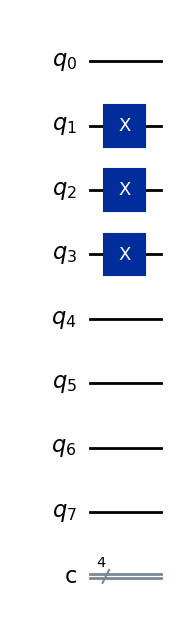

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(8,4)   #N = 8 qubits. N=4 classical bits

qc.x(1)
qc.x(2)
qc.x(3)

qc.draw("mpl")


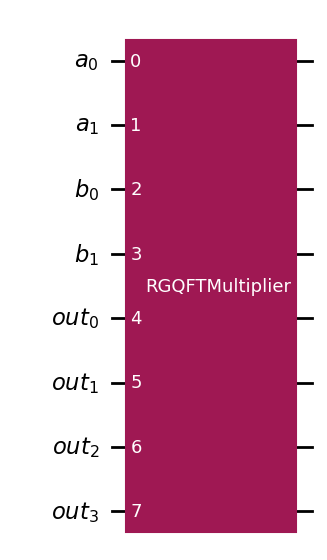

In [4]:
#This is the multiplier
qc1 = RGQFTMultiplier(num_state_qubits=2, num_result_qubits=4)

qc1.draw("mpl")


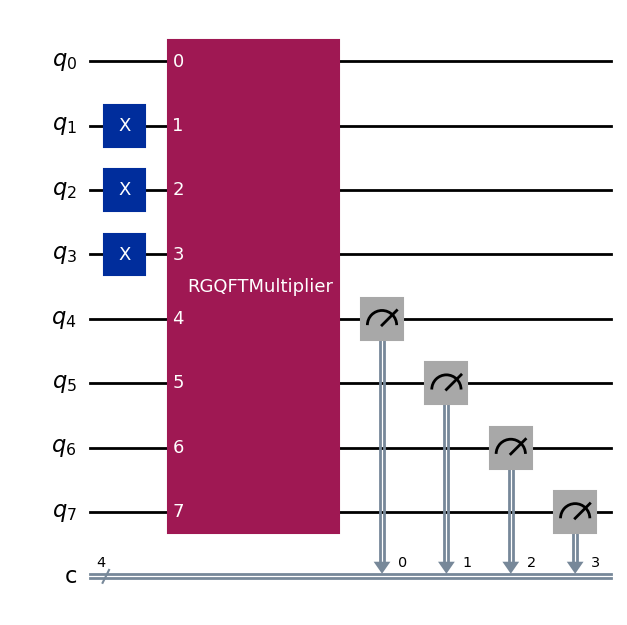

In [5]:
#Adding qc and qc1 using compose

qc = qc.compose(qc1)

qc.measure(4,0)

qc.measure(5,1)

qc.measure(6,2)

qc.measure(7,3)


qc.draw("mpl")

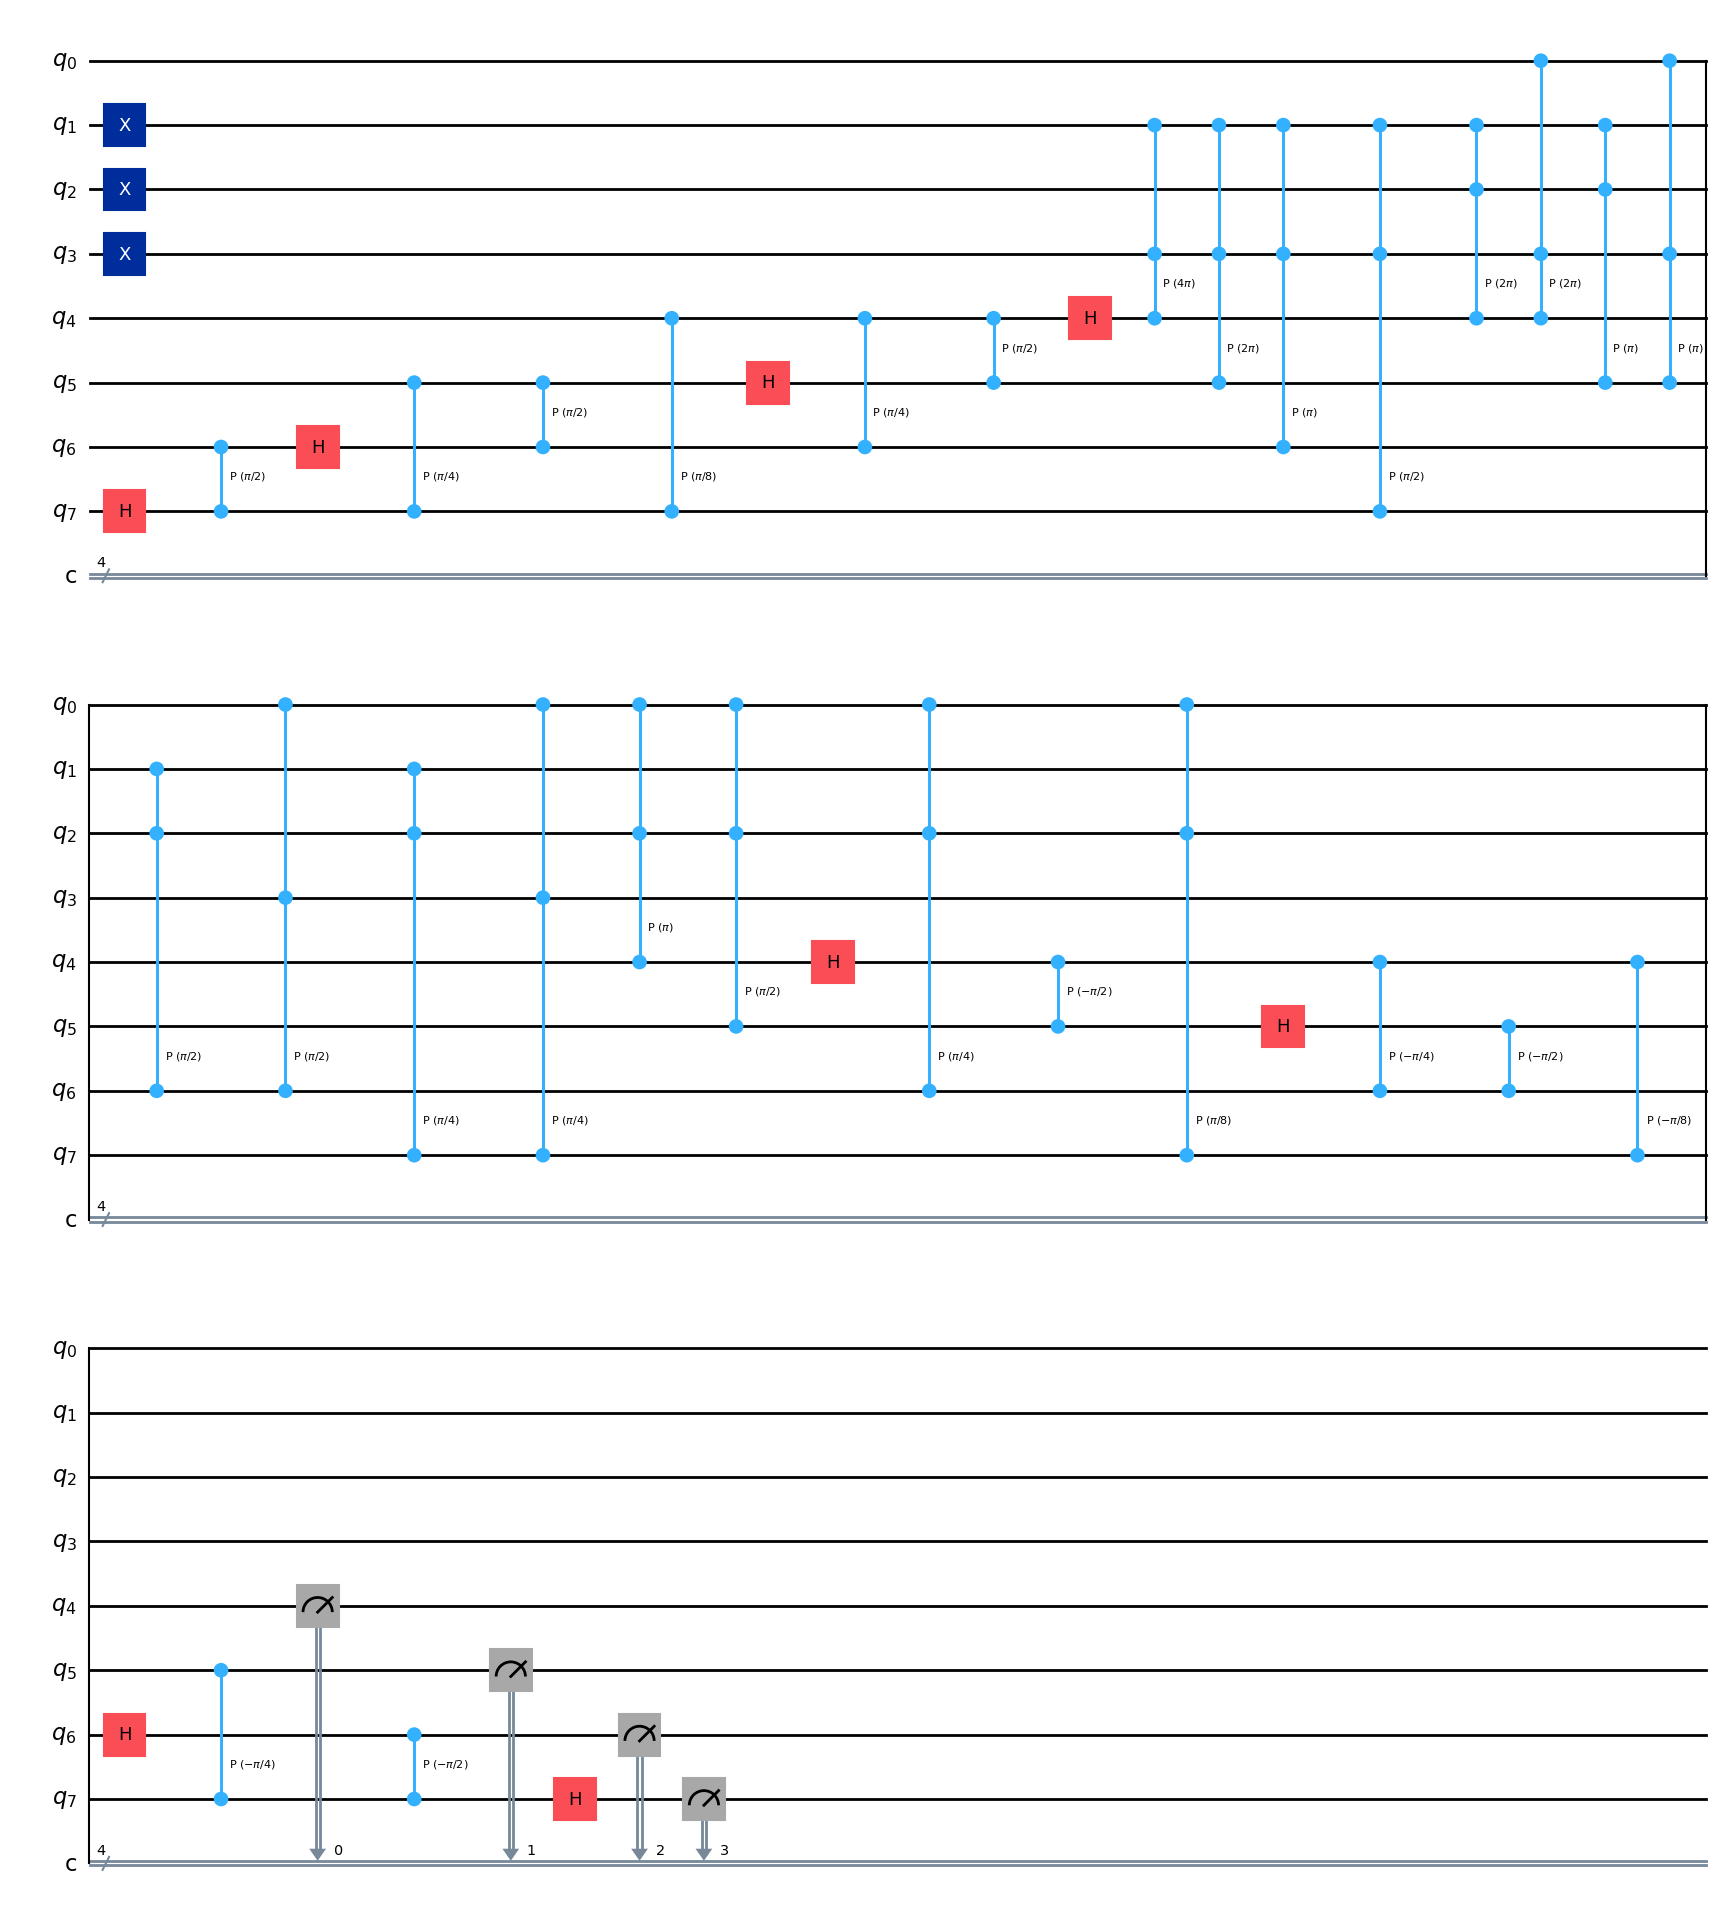

In [6]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [7]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. 
#counts
print('RESULT ', counts)


RESULT  {'0110': 1000}


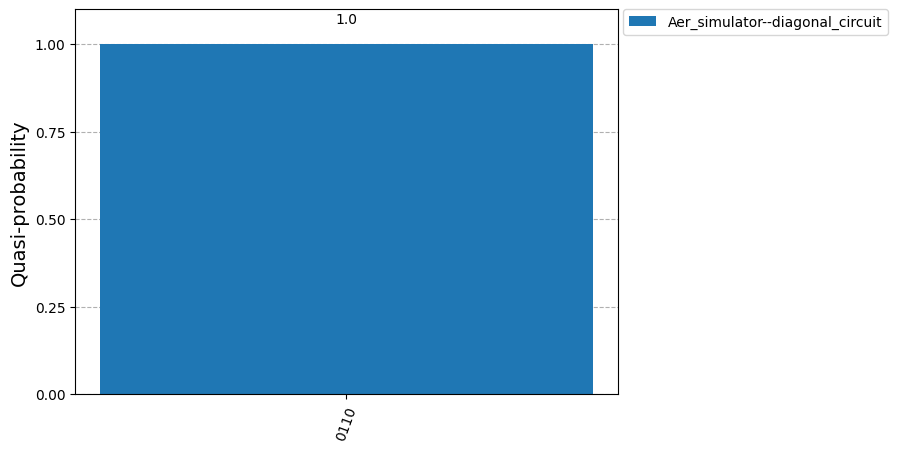

In [8]:
plot_distribution([counts], legend = ['Aer_simulator--diagonal_circuit'])


#result = job.result()

In [9]:
print('2*3 = ',counts)

2*3 =  {'0110': 1000}


In [10]:
print('0110 = 6 in binary')

0110 = 6 in binary
